In [ ]:
""" 
    Robot Grid Environment
    This code implements a simple grid environment for a robot using OpenAI's Gym library.
    The robot can move in a grid, collect tasks, and recharge its energy at charging stations.
    The environment is designed to be used for reinforcement learning tasks.
    The robot starts at the top-left corner of the grid and can move in four directions (up, down, left, right).
    The robot has a limited energy supply and can recharge at designated charging stations.
"""



# Install required libraries for the environment and visualization
!pip install gym matplotlib

#import libraries
import numpy as np                  # For numerical operations
import random                       # For random number generation
import gym                          # OPenAI Gym for creating the environment
from gym import spaces              # For defining action and observation spaces
import matplotlib.pyplot as plt     # For plotting
from matplotlib import animation    # For creating animations
from IPython.display import HTML    # For displaying animations in Jupyter Notebook


# Constants defining grid size, number of tasks, and charging station positions
GRID_SIZE = 10
NUM_TASKS = 10
CHARGING_STATIONS = [(0, 9), (9, 0)]

# Define a custom environment inheriting from gym.Env
class RobotGridEnv(gym.Env):
    def __init__(self):
        super(RobotGridEnv, self).__init__()        # Call the parent class constructor
        self.grid_size = GRID_SIZE                  # Size of the grid world
        self.tasks = []                             # List of task locations (targets)
        self.robot_pos = [0, 0]                     # Robot's initial position
        self.energy = 100                           # Robot's initial energy
        self.target = None                          # Current target position
        self.charging_stations = CHARGING_STATIONS  # Charging station positions

        self.action_space = spaces.Discrete(5)      # 5 possible actions: UP, DOWN, LEFT, RIGHT, STAY
        # Observation space: robot position (x, y), target position (tx, ty), energy level
        self.observation_space = spaces.Box(
            low=0, 
            high=self.grid_size - 1, 
            shape=(5,), 
            dtype=np.int32
            ) 
        # Initialize the environment
        self.reset()

    def reset(self):
        self.robot_pos = [0, 0]                     # Reset robot position to (0, 0)
        self.energy = 100                           # Reset energy to 100
        # Generate random task locations on the grid
        self.tasks = [(random.randint(0, 9), random.randint(0, 9)) for _ in range(NUM_TASKS)]
        self.target = random.choice(self.tasks)     # Select a random target from the tasks
        return self._get_obs()                      # Return initial observation

    def _get_obs(self):
        # Return the observation as a vector of robot_x, robot_y, target_x, target_y, energy
        tx, ty = self.target
        return np.array([self.robot_pos[0], self.robot_pos[1], tx, ty, self.energy], dtype=np.int32)

    def step(self, action):
        # Get current robot position
        x, y = self.robot_pos

        # Update position based on action taken
        if action == 0 and y < self.grid_size - 1:  # UP
            y += 1
        elif action == 1 and y > 0:  # DOWN
            y -= 1
        elif action == 2 and x > 0:  # LEFT
            x -= 1
        elif action == 3 and x < self.grid_size - 1:  # RIGHT
            x += 1
        # action == 4: STAY

        # Update robot's position
        self.robot_pos = [x, y]

        # Decrease energy by 1 for any action
        self.energy -= 1

        # Default reward per step
        reward = -1
        done = False

        # If robot reaches the target
        if self.target and self.robot_pos == list(self.target):
            reward = 10                         # Reward for reaching the target
            self.tasks.remove(self.target)      # Remove the completed task
            # Set new target if tasks remain
            self.target = random.choice(self.tasks) if self.tasks else None
            # If no tasks left, episode ends
            if not self.tasks:
                done = True

        # If robot reaches a charging station
        if tuple(self.robot_pos) in self.charging_stations:
            self.energy = 100                   # Refill energy
            reward = 5                          # Reward for charging

        # If energy runs out
        if self.energy <= 0:
            reward = -20                        # Penalty for running out of energy   
            done = True                         # End episode

        # Return new observation, reward, done flag, and info dictionary
        return self._get_obs(), reward, done, {}

    def render(self):
        # Visualize the grid
        grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

        # Mark tasks with value 2
        for t in self.tasks:
            grid[t[1], t[0]] = 2

        # Mark charging stations with value 3
        for cs in self.charging_stations:
            grid[cs[1], cs[0]] = 3

        # Mark robot's position with value 1
        x, y = self.robot_pos
        grid[y, x] = 1
        print(grid)



# === TESTING THE ENVIRONMENT ===
# Create an instance of the environment

env = RobotGridEnv()

# Reset the environment to start a new episode
obs = env.reset()

done = False            # Flag to indicate if the episode is done
total_reward = 0        # Track total reward collected during the episode

# Run one episode with a random policy (choosing actions randomly)
while not done:
    action = env.action_space.sample()                              # random action
    obs, reward, done, _ = env.step(action)                         # Take a step in the environment
    total_reward += reward                                          # Accumulate reward
    print(f"Pos: {obs[:2]}, Energy: {obs[4]}, Reward: {reward}")    # Print robot state
    env.render()                                                    # Show grid

# Print the final total reward
print("Total Reward:", total_reward)


Pos: [1 0], Energy: 99, Reward: -1
[[0 1 0 0 0 0 0 0 2 3]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [2 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [3 0 0 0 2 0 0 2 0 0]]
Pos: [2 0], Energy: 98, Reward: -1
[[0 0 1 0 0 0 0 0 2 3]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [2 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [3 0 0 0 2 0 0 2 0 0]]
Pos: [3 0], Energy: 97, Reward: -1
[[0 0 0 1 0 0 0 0 2 3]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [2 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0]
 [3 0 0 0 2 0 0 2 0 0]]
Pos: [2 0], Energy: 96, Reward: -1
[[0 0 1 0 0 0 0 0 2 3]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [2 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 

----------
----------------------

In [ ]:
import numpy as np                      # For numerical operations
import matplotlib.pyplot as plt         # For plotting reward graphs
from collections import defaultdict     # For initializing Q-table with default zero values
import random                           # For random action selection (exploration)

# Q-learning agent class
class QLearningAgent:
            
        """ env: the environment where the agent operates.

            alpha: learning rate – how much newly acquired information overrides the old.

            gamma: discount factor – importance of future rewards.

            epsilon: exploration rate – probability of choosing a random action.

            epsilon_decay: how quickly epsilon decreases.

            epsilon_min: minimum exploration rate.
        """

    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.05):
        self.env = env
        self.q_table = defaultdict(lambda: np.zeros(env.action_space.n))  # Q-table with default 0s for each action
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

    def get_state(self, obs):
        return tuple(obs[:4]) + (obs[4] // 10,)

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()   # Explore: pick a random action
        else:
            return np.argmax(self.q_table[state])   # Exploit: pick the action with the highest Q-value

    def learn(self, state, action, reward, next_state, done):
        q_predict = self.q_table[state][action]                                 # Current Q-value prediction
        q_target = reward if done else reward + self.gamma * np.max(self.q_table[next_state])
        self.q_table[state][action] += self.alpha * (q_target - q_predict)      # Q-value update

    def train(self, episodes=1000, max_steps=200):
        rewards = []
        for ep in range(episodes):                                  # Loop over episodes
            obs = self.env.reset()
            state = self.get_state(obs)
            total_reward = 0
            for _ in range(max_steps):                              # Loop over steps in the episode
                action = self.choose_action(state)                  # Select action using policy
                next_obs, reward, done, _ = self.env.step(action)   # Take action and observe result
                next_state = self.get_state(next_obs)
                self.learn(state, action, reward, next_state, done) # Update Q-values, Learn from the transition
                state = next_state                                  # Move to next state
                total_reward += reward                              # Accumulate reward
                if done:
                    break                                           # End episode if done
            self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay) # Decay exploration rate
            rewards.append(total_reward)                                            # Store total reward from the episode
        return rewards                                                              # Return reward history after training

# Function to visualize total rewards over episodes
def display_rewards(reward_list):
    plt.plot(reward_list)
    plt.title("Q-learning ile Toplam Ödül (Episode Başına)")
    plt.xlabel("Episode")
    plt.ylabel("Toplam Ödül")
    plt.grid(True)
    plt.show()


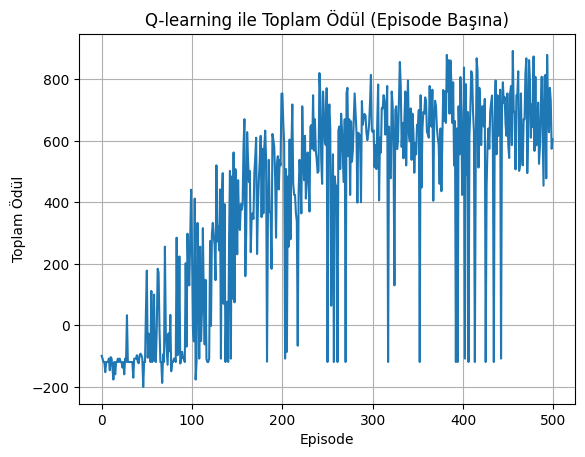

In [ ]:
env = RobotGridEnv()                # Initialize the custom grid environment
agent = QLearningAgent(env)         # Create a Q-learning agent with the environment
rewards = agent.train(episodes=500) # Train the agent over 500 episodes and collect total rewards per episode
display_rewards(rewards)            # Display a line plot showing how rewards evolved over episodes


In [ ]:
obs = env.reset()               # Reset the environment to its initial state
state = agent.get_state(obs)    # Convert the observation to a state representation suitable for Q-table indexing
done = False                    # Initialize control flags and counters
total_reward = 0                # Initialize total reward
steps = 0                       # Counts the number of steps taken
max_steps = 200                 # Maximum number of steps allowed in one episode

# Run the agent in the environment using the learned Q-table
while not done and steps < max_steps:
    # Select the action with the highest Q-value for the current state (greedy policy)
    action = np.argmax(agent.q_table[state])
    # Take the selected action in the environment
    obs, reward, done, _ = env.step(action)
    # Convert the new observation to the next state
    state = agent.get_state(obs)
    # Accumulate the received reward
    total_reward += reward
    # Render the current state of the environment (prints the grid)
    env.render()
    # Increment the step counter
    steps += 1

# Print the total reward earned by the trained agent in this episode
print("Eğitimli ajan toplam ödül:", total_reward)


[[0 0 0 2 0 0 0 0 0 3]
 [1 0 0 0 0 0 0 0 0 0]
 [2 0 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [3 0 0 2 0 0 0 0 2 0]]
[[0 0 0 2 0 0 0 0 0 3]
 [1 0 0 0 0 0 0 0 0 0]
 [2 0 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [3 0 0 2 0 0 0 0 2 0]]
[[0 0 0 2 0 0 0 0 0 3]
 [1 0 0 0 0 0 0 0 0 0]
 [2 0 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [3 0 0 2 0 0 0 0 2 0]]
[[0 0 0 2 0 0 0 0 0 3]
 [1 0 0 0 0 0 0 0 0 0]
 [2 0 2 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [3 0 0 2 0 0 0 0 2 0]]
[[0 0 0 2 0 0 0 0 0 3]
 [1 0 0 0 0 0 0 0 0 0]
 [2 0 2 2 0 0 0 0 0 0]
 [0 0 0